# txt data の取り扱い
- **線形近似, 非線形近似**

03. <u>**txt data の取り扱い, 線形近似, 非線形近似**</u>

    - `状況　:　あるセンサーを使ってdataを取得し txt data で出力した。この時系列 data を分析したい`
    
        - **データ分析の目的**
            - *data を上手く前処理して、必要な data を抽出する*
        
        - **保有している実験データ**
            - *センサーから出力された txt data*


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline

In [8]:
plt.style.use('ggplot')

In [9]:
df = pd.read_csv('./resources/sensor_data.txt', delimiter='\t', header=6)
df.head()

,Time[s],Intensity[a.u.]
0,[1],11.817864
1,[2],11.797914
2,[3],11.797964
3,[4],11.778014
4,[5],11.818065


In [10]:
df['Time[s]'] = df['Time[s]'].apply(lambda x: float(x[1:-1]))

In [11]:
df.head()

,Time[s],Intensity[a.u.]
0,1.0,11.817864
1,2.0,11.797914
2,3.0,11.797964
3,4.0,11.778014
4,5.0,11.818065


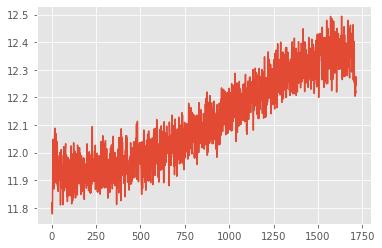

In [12]:
plt.plot(df['Time[s]'], df['Intensity[a.u.]'])

- **最初の 250 秒くらいは data が一定になっている**

- **250 秒くらいは data が上がり始めている**

- **1500 秒くらいのところでまた　data が一定になている**


### **data　バラつき　＝　標準偏差を求める**

In [13]:
data = df['Intensity[a.u.]'][:250]
data

0      11.817864
1      11.797914
2      11.797964
3      11.778014
4      11.818065
         ...    
245    12.026493
246    11.866602
247    11.956711
248    11.916821
249    11.956931
Name: Intensity[a.u.], Length: 250, dtype: float64

In [15]:
data.describe()

count    250.000000
mean      11.928999
std        0.057711
min       11.778014
25%       11.889238
50%       11.921094
75%       11.967363
max       12.094689
Name: Intensity[a.u.], dtype: float64

### **1750 秒後の振る舞いを確認する為に fitting をかける**
- curve_fit を使用

In [18]:
# 線形関数
def linear_fit(x , a, b):
    return a * x + b

In [20]:
# paramertor , 共分散が帰ってくる
param, cov = curve_fit(linear_fit, df['Time[s]'], df['Intensity[a.u.]'])
param

array([3.10054862e-04, 1.18501781e+01])

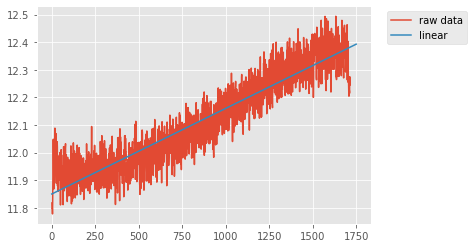

In [23]:
plt.plot(df['Time[s]'], df['Intensity[a.u.]'], label='raw data')
# fitting した関数を描く、その前に x　を定義
x = np.arange(0, 1750, 0.01)
y = param[0] * x + param[1]
plt.plot(x, y, label='linear')
plt.legend(bbox_to_anchor=(1.3,1.0))

- *最初と最後の部分があまり変化をしていない。本当ならば中央が線形の領域*
    - **傾きが影響を受けて緩やかになってしまっている**


- <u>このような場合は**シグモイド関数**( 非線形 )の方が適している</u>

### **シグモイド関数を描く**

Text(0.5, 1.0, 'sigmoid function')

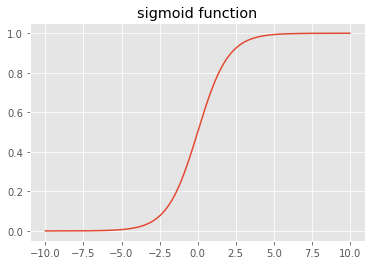

In [25]:
x = np.arange(-10, 10, 0.01)
# シグモイド関数
y = 1.0 / (np.exp(-x) + 1.0)
plt.plot(x, y)
plt.title('sigmoid function')

- `sigmoid function`

    - *S字の曲線になっている*
    
        - **xとして負の大きな値を代入すると無限大になる**
            - <u>1/∞　として 0 に漸近する</u>
            
        - **xとして正の大きな値を代入すると 0 に漸近するので**
            - <u>1/1　として 1 に漸近する</u>
        

In [27]:
# 非線形
def nonlinear_fit(x, a, b, c, d):
    return a / (np.exp(-b*x + c) + 1.0) + d

In [28]:
param2, cov2 = curve_fit(nonlinear_fit, df['Time[s]'], df['Intensity[a.u.]'])
param2

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


array([-4.84020798e-01, -3.82954607e-03, -3.85352690e+00,  1.23968891e+01])

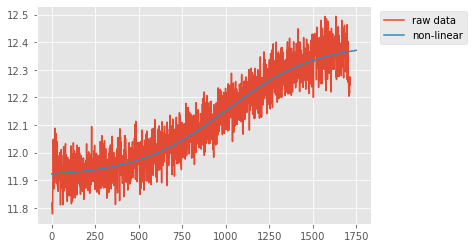

In [29]:
plt.plot(df['Time[s]'], df['Intensity[a.u.]'], label='raw data')
# fitting した関数を描く、その前に x　を定義
x = np.arange(0, 1750, 0.01)
y = param2[0] / (np.exp(-param2[1]*x + param2[2]) + 1.0) + param2[3]
plt.plot(x, y, label='non-linear')
plt.legend(bbox_to_anchor=(1.3,1.0))

- **このように data の特性に合わせて関数型を変えることで data の次の瞬間を上手く予測できる**

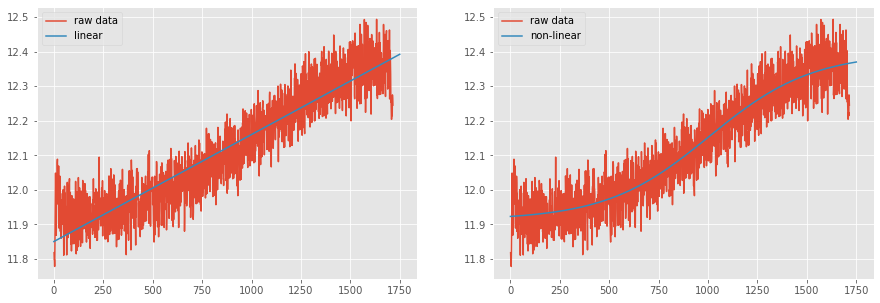

In [38]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(df['Time[s]'], df['Intensity[a.u.]'], label='raw data')
ax[1].plot(df['Time[s]'], df['Intensity[a.u.]'], label='raw data')
x = np.arange(0, 1750, 0.01)
y = param[0] * x + param[1]
y2 = param2[0] / (np.exp(-param2[1]*x + param2[2]) + 1.0) + param2[3]
ax[0].plot(x, y, label='linear')
ax[1].plot(x, y2, label='non-linear')
ax[0].legend()
ax[1].legend()